# Predecting Diabetes

In [1]:
import pandas as pd
import matplotlib.pyplot as plot
import numpy as np

%matplotlib inline

## Load and Review data

In [2]:
df = pd.read_csv("./data/pima-data.csv")
df.shape

(768, 10)

In [3]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [4]:
df.tail(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


## Preprocess Data
#### Eliminate Columns -- Not used, No values, Duplicates
#### Check for Correlation between columns -- Same information in a different format
#### Check for null values in Data

In [5]:
df.isnull().values.any()

False

In [6]:
def plot_corr(df, size=10):
    corr = df.corr()
    fig, ax = plot.subplots(figsize=(size,size))
    ax.matshow(corr)
    plot.xticks(range(len(corr.columns)), corr.columns)
    plot.yticks(range(len(corr.columns)), corr.columns)

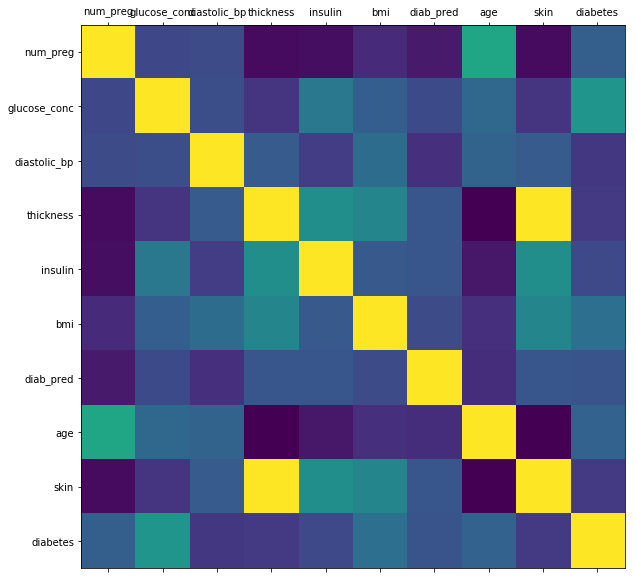

In [7]:
plot_corr(df)

In [8]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [9]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [10]:
del df['skin']

In [11]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


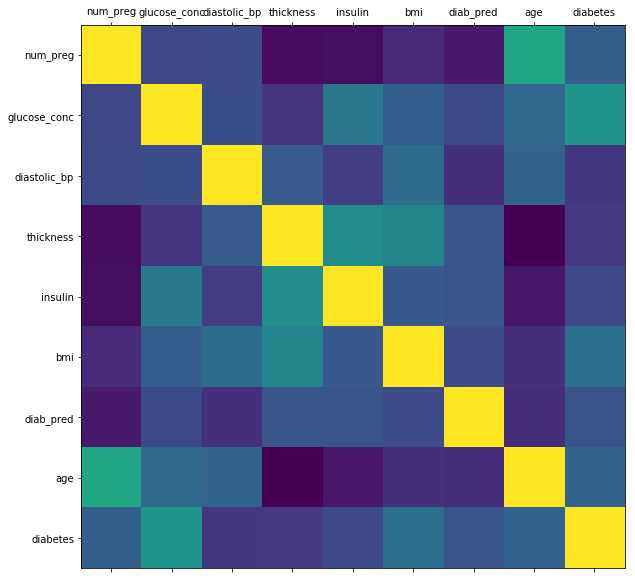

In [12]:
plot_corr(df)

### Check for data types because most of the algorithms will work with mathematical 
Diabetes column having bollean datatype. we need to change that column to binary false as 0 and true as 1

In [13]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


In [14]:
diabetes_map = {True:1, False:0}

In [15]:
df['diabetes'] = df['diabetes'].map(diabetes_map)

In [16]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Check for class variable ratio

In [17]:
true_count = len(df.loc[df['diabetes'] == 1])
false_count = len(df.loc[df['diabetes'] == 0])
print("No of trues", true_count)
print("No of falses:", false_count)
print("Percentage of Trues {0}, {1:2.2f}%".format(true_count, true_count/(true_count + false_count) *100))
print("Percentage of Trues {0}, {1:2.2f}%".format(false_count , false_count/(true_count + false_count)*100))

No of trues 268
No of falses: 500
Percentage of Trues 268, 34.90%
Percentage of Trues 500, 65.10%


### Splitting Data 
70% training data 30% testing data

In [18]:
from sklearn.cross_validation import train_test_split

feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp','thickness','insulin','bmi','diab_pred','age']
predicted_class_name = ['diabetes']

x = df[feature_col_names].values
y = df[predicted_class_name].values
split_test_size = 0.30

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=split_test_size, random_state=42)

C:\Users\Chinnodu\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [19]:
print(len(x_train))

537


In [20]:
actual_rec = len(df)
actual_true_rec = len(df.loc[df['diabetes'] == 1])
actual_false_rec = len(df.loc[df['diabetes'] == 0])

print("actual records: ",actual_rec)
print("actual true records: {0}, {1:2.2f}%".format(actual_true_rec,actual_true_rec/actual_rec*100))
print("actual false records: {0}, {1:2.2f}%".format(actual_false_rec,actual_false_rec/actual_rec*100))


actual records:  768
actual true records: 268, 34.90%
actual false records: 500, 65.10%


In [21]:
train_rec = len(x_train)
test_rec = len(x_test)
train_true_rec = len(y_train[y_train[:] == 1])
train_false_rec = len(y_train[y_train[:] == 0])
test_true_rec = len(y_test[y_test[:] == 1])
test_false_rec = len(y_test[y_test[:] == 0])
print("traing data records: {0}, {1:2.2f}% of actual records".format(train_rec, train_rec/actual_rec*100))
print("test data records: {0}, {1:2.2f}% of actual records".format(test_rec, test_rec/actual_rec*100))
print("\n")
print("train data true records: {0}, {1:2.2f}%".format(train_true_rec, train_true_rec/train_rec*100))
print("train data false records: {0}, {1:2.2f}%".format(train_false_rec, train_false_rec/train_rec*100))
print("\n")
print("test data true records: {0}, {1:2.2f}%".format(test_true_rec, test_true_rec/test_rec*100))
print("test data false records: {0}, {1:2.2f}%".format(test_false_rec, test_false_rec/test_rec*100))


traing data records: 537, 69.92% of actual records
test data records: 231, 30.08% of actual records


train data true records: 188, 35.01%
train data false records: 349, 64.99%


test data true records: 80, 34.63%
test data false records: 151, 65.37%


### checking for misisng values or values having 0

In [22]:
print("# rows missing num_preg: ", len(df.loc[df['num_preg'] == 0]))
print("# rows missing glucose_concn: ", len(df.loc[df['glucose_conc'] == 0]))
print("# rows missing diastolic_bp: ", len(df.loc[df['diastolic_bp'] == 0]))
print("# rows missing thickness: ", len(df.loc[df['thickness'] == 0]))
print("# rows missing insulin: ", len(df.loc[df['insulin'] == 0]))
print("# rows missing bmi: ", len(df.loc[df['bmi'] == 0]))
print("# rows missing diab_pred: ", len(df.loc[df['diab_pred'] == 0]))
print("# rows missing age: ", len(df.loc[df['age'] == 0]))



# rows missing num_preg:  111
# rows missing glucose_concn:  5
# rows missing diastolic_bp:  35
# rows missing thickness:  227
# rows missing insulin:  374
# rows missing bmi:  11
# rows missing diab_pred:  0
# rows missing age:  0


In [23]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## replacing the missing values with mean by using imputer

In [24]:
from sklearn.preprocessing import Imputer

fill_0 = Imputer(missing_values=0, strategy='mean', axis =0)

x_train = fill_0.fit_transform(x_train)
x_test = fill_0.fit_transform(x_test)

In [25]:
print(x_train[0:5])
print(sum(x_train[0])/len(x_train))

[[1.00000000e+00 9.50000000e+01 6.00000000e+01 1.80000000e+01
  5.80000000e+01 2.39000000e+01 2.60000000e-01 2.20000000e+01]
 [5.00000000e+00 1.05000000e+02 7.20000000e+01 2.90000000e+01
  3.25000000e+02 3.69000000e+01 1.59000000e-01 2.80000000e+01]
 [4.34056399e+00 1.35000000e+02 6.80000000e+01 4.20000000e+01
  2.50000000e+02 4.23000000e+01 3.65000000e-01 2.40000000e+01]
 [4.00000000e+00 1.31000000e+02 6.80000000e+01 2.10000000e+01
  1.66000000e+02 3.31000000e+01 1.60000000e-01 2.80000000e+01]
 [1.00000000e+00 1.03000000e+02 3.00000000e+01 3.80000000e+01
  8.30000000e+01 4.33000000e+01 1.83000000e-01 3.30000000e+01]]
0.5179888268156425


### Training algorithm

In [26]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(x_train,y_train.ravel())

GaussianNB(priors=None)

In [27]:
nb_predict_train = nb_model.predict(x_train)
#print(nb_predict_train)

from sklearn import metrics

print("training data accuracy: {0:2.2f}%".format(metrics.accuracy_score(y_train, nb_predict_train)))



training data accuracy: 0.75%


In [28]:
nb_predict_test = nb_model.predict(x_test)
print(nb_predict_test)
#print(y_test)
print("test data accuracy: {0:2.2f}%".format(metrics.accuracy_score(y_test, nb_predict_test)))

[0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0
 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1
 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0
 0 0 0 0 0 0 0 0 0]
test data accuracy: 0.74%


#### Confusion matrices

In [29]:
print("confusion matrix")
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))

print("classification report")
print(metrics.classification_report(y_test, nb_predict_test))

confusion matrix
[[118  33]
 [ 28  52]]
classification report
             precision    recall  f1-score   support

          0       0.81      0.78      0.79       151
          1       0.61      0.65      0.63        80

avg / total       0.74      0.74      0.74       231



### Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [31]:
rf_predict_train = rf_model.predict(x_train)
#print(rf_predict_train)
print("accuracy of training data {0:2.2f}%".format(metrics.accuracy_score(y_train, rf_predict_train)))
rf_predict_test = rf_model.predict(x_test)
print("accuracy of test data {0:2.2f}%".format(metrics.accuracy_score(y_test, rf_predict_test)))

print("Confusion matrix")
print("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test)))
print("Classification report")
print(metrics.classification_report(y_test, rf_predict_test))

accuracy of training data 0.99%
accuracy of test data 0.71%
Confusion matrix
[[121  30]
 [ 37  43]]
Classification report
             precision    recall  f1-score   support

          0       0.77      0.80      0.78       151
          1       0.59      0.54      0.56        80

avg / total       0.70      0.71      0.71       231



## Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=0.7, random_state=42)
lr_model.fit(x_train,y_train.ravel())

LogisticRegression(C=0.7, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
lr_predict_train = lr_model.predict(x_train)
#print(lr_predict_train)
print("accuracy of train data: {0:2.2f}%".format(metrics.accuracy_score(y_train,lr_predict_train)))
lr_predict_test = lr_model.predict(x_test)
print("accuracy of test data: {0:2.2f}%".format(metrics.accuracy_score(y_test,lr_predict_test)))
print("\n")
print("confusion matrix")
print("{0}".format(metrics.confusion_matrix(y_test,lr_predict_test)))
print("Classification report")
print(metrics.classification_report(y_test, lr_predict_test))

accuracy of train data: 0.77%
accuracy of test data: 0.74%


confusion matrix
[[128  23]
 [ 36  44]]
Classification report
             precision    recall  f1-score   support

          0       0.78      0.85      0.81       151
          1       0.66      0.55      0.60        80

avg / total       0.74      0.74      0.74       231



### Improving logistic regression by regularization hyperparameter

1st max recall value 0.613 occured at C=1.400


Text(0,0.5,'recall scores')

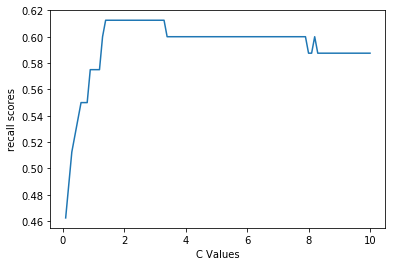

In [34]:
c_start = 0.1
c_end = 10
c_inc = 0.1

c_values, recall_scores = [],[]

c_val = c_start
best_recall_score=0
while(c_val<c_end):
    c_values.append(c_val)
    lr_model_loop = LogisticRegression(C=c_val, random_state=42)
    lr_model_loop.fit(x_train, y_train.ravel())
    lr_model_loop_predict_test = lr_model_loop.predict(x_test)
    recall_score = metrics.recall_score(y_test, lr_model_loop_predict_test)
    recall_scores.append(recall_score)
    if(recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_model_loop_predict_test   
    c_val = c_val + c_inc
    
    
best_score_c_val = c_values[recall_scores.index(best_recall_score)]
print("1st max recall value {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_c_val))

%matplotlib inline
plot.plot(c_values, recall_scores,"-")
plot.xlabel("C Values")
plot.ylabel("recall scores")


### Logistic regression with class_weight='balanced'

1st max recall value 0.738 occured at C=0.300


Text(0,0.5,'Recall Scores')

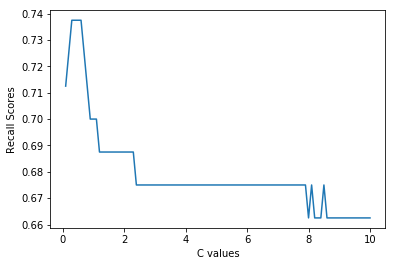

In [35]:
c_start = 0.1
c_end = 10
c_inc = 0.1

c_values, recall_scores = [],[]

c_val = c_start
best_recall_score=0
while(c_val<c_end):
    c_values.append(c_val)
    lr_model_loop = LogisticRegression(C=c_val, class_weight='balanced', random_state=42)
    lr_model_loop.fit(x_train, y_train.ravel())
    lr_model_loop_predict_test = lr_model_loop.predict(x_test)
    recall_score = metrics.recall_score(y_test, lr_model_loop_predict_test)
    recall_scores.append(recall_score)
    if(recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_model_loop_predict_test   
    c_val = c_val + c_inc
    
    
best_score_c_val = c_values[recall_scores.index(best_recall_score)]
print("1st max recall value {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_c_val))

%matplotlib inline
plot.plot(c_values, recall_scores, "-")
plot.xlabel("C values")
plot.ylabel("Recall Scores")


In [36]:
lr_imp_model = LogisticRegression( class_weight='balanced', C=best_score_c_val, random_state=42)
lr_imp_model.fit(x_train, y_train.ravel())
lr_imp_mod_train = lr_imp_model.predict(x_train)
lr_imp_mod_test = lr_imp_model.predict(x_test)
print("accuracy of training data: {0:2.2f}%".format(metrics.accuracy_score(y_train, lr_imp_mod_train)))
print("accuracy of test data: {0:2.2f}%".format(metrics.accuracy_score(y_test, lr_imp_mod_test)))
print("\n")
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, lr_imp_mod_test)))
print("Classification Report")
print(metrics.classification_report(y_test, lr_imp_mod_test))

accuracy of training data: 0.74%
accuracy of test data: 0.71%


Confusion Matrix
[[106  45]
 [ 21  59]]
Classification Report
             precision    recall  f1-score   support

          0       0.83      0.70      0.76       151
          1       0.57      0.74      0.64        80

avg / total       0.74      0.71      0.72       231



In [40]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs=1, random_state=42, Cs=3, cv=10, refit=False, class_weight="balanced")
lr_cv_model.fit(x_train, y_train.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
           refit=False, scoring=None, solver='lbfgs', tol=0.0001,
           verbose=0)

In [41]:
lr_pre_train = lr_cv_model.predict(x_train)
#print(lr_predict_train)
print("accuracy of train data: {0:2.2f}%".format(metrics.accuracy_score(y_train,lr_pre_train)))
lr_pre_test = lr_cv_model.predict(x_test)
print("accuracy of test data: {0:2.2f}%".format(metrics.accuracy_score(y_test,lr_pre_test)))
print("\n")
print("confusion matrix")
print("{0}".format(metrics.confusion_matrix(y_test,lr_pre_test)))
print("Classification report")
print(metrics.classification_report(y_test, lr_pre_test))

accuracy of train data: 0.74%
accuracy of test data: 0.78%


confusion matrix
[[125  33]
 [ 17  56]]
Classification report
             precision    recall  f1-score   support

          0       0.88      0.79      0.83       158
          1       0.63      0.77      0.69        73

avg / total       0.80      0.78      0.79       231



## Trying to Improve Naive Bayes classification by spliting the data into 3 parts: training, validation and test data

In [37]:
#feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp','thickness','insulin','bmi','diab_pred','age']
#predicted_class_name = ['diabetes']

#x = df[feature_col_names].values
#y = df[predicted_class_name].values
#split_test_size = 0.20
#split_validate_size =0.20
x_train, x_validate, x_test = np.split(df.sample(frac=1), [int(.40*len(df)), int(.70*len(df))])
#x_train, x_validate, x_test, y_train, y_validate, y_test = train_test_split(x, y, test_size=split_test_size, random_state=42)
y_train = x_train['diabetes']
del x_train['diabetes']
y_validate = x_validate['diabetes']
del x_validate['diabetes']
y_test = x_test['diabetes']
del x_test['diabetes']

fill_1 = Imputer(missing_values=0, strategy='mean', axis =0)

x_train = fill_1.fit_transform(x_train)
x_validate = fill_1.fit_transform(x_validate)
x_test = fill_1.fit_transform(x_test)

In [38]:
print("Training Data details:")
train_rec = len(x_train)
train_true = len(y_train[y_train[:] == 1])
train_false = len(y_train[y_train[:] == 0])
print("Total Training records:", train_rec)
print("True records in training data: {0}, {1:2.2f}%".format(train_true, train_true/train_rec*100))
print("False records in training data: {0}, {1:2.2f}%".format(train_false, train_false/train_rec*100))

print("\n")
print("Validate Data details:")
validate_rec = len(x_validate)
validate_true = len(y_validate[y_validate[:] == 1])
validate_false = len(y_validate[y_validate[:] == 0])
print("Total Training records:", validate_rec)
print("True records in training data: {0}, {1:2.2f}%".format(validate_true, validate_true/validate_rec*100))
print("False records in training data: {0}, {1:2.2f}%".format(validate_false, validate_false/validate_rec*100))

print("\n")
print("Test Data details:")
test_rec = len(x_test)
test_true = len(y_test[y_test[:] == 1])
test_false = len(y_test[y_test[:] == 0])
print("Total Training records:", test_rec)
print("True records in training data: {0}, {1:2.2f}%".format(test_true, test_true/test_rec*100))
print("False records in training data: {0}, {1:2.2f}%".format(test_false, test_false/test_rec*100))


Training Data details:
Total Training records: 307
True records in training data: 111, 36.16%
False records in training data: 196, 63.84%


Validate Data details:
Total Training records: 230
True records in training data: 84, 36.52%
False records in training data: 146, 63.48%


Test Data details:
Total Training records: 231
True records in training data: 73, 31.60%
False records in training data: 158, 68.40%


### Applying Naive Bayes Algorithm

In [39]:
nb_model = GaussianNB()
nb_model.fit(x_train,y_train.ravel())
nb_predict_train = nb_model.predict(x_train)
nb_predict_validate = nb_model.predict(x_validate)
nb_predict_test = nb_model.predict(x_test)
print("Accuracy with train:{0:2.2f}%".format(metrics.accuracy_score(y_train, nb_predict_train)))
print("Accuracy with validation:{0:2.2f}%".format(metrics.accuracy_score(y_validate, nb_predict_validate)))
print("Accuracy with test data:{0:2.2f}%".format(metrics.accuracy_score(y_test, nb_predict_test)))
print("\n")
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test))



Accuracy with train:0.74%
Accuracy with validation:0.74%
Accuracy with test data:0.79%


Confusion Matrix
[[134  24]
 [ 25  48]]
Classification Report
             precision    recall  f1-score   support

          0       0.84      0.85      0.85       158
          1       0.67      0.66      0.66        73

avg / total       0.79      0.79      0.79       231



In [1]:
2+2

4